In [1]:
import warnings
warnings.filterwarnings('ignore')
import requests
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [2]:
weather_df = pd.read_csv('temperature.csv')
weather_df.head(20)

,Unnamed: 0,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month,date,hour,minute
0,0,24,10,0,8.7,4,1,31,09:56 AM,09:45 PM,...,1015,11,10,320,10,2009,1,1,0,0
1,1,24,10,0,8.7,4,1,31,09:56 AM,09:45 PM,...,1015,11,10,315,11,2009,1,1,1,0
2,2,24,10,0,8.7,4,1,31,09:56 AM,09:45 PM,...,1015,11,10,310,11,2009,1,1,2,0
3,3,24,10,0,8.7,4,1,31,09:56 AM,09:45 PM,...,1015,10,10,304,12,2009,1,1,3,0
4,4,24,10,0,8.7,4,1,31,09:56 AM,09:45 PM,...,1016,11,10,302,11,2009,1,1,4,0
5,5,24,10,0,8.7,4,1,31,09:56 AM,09:45 PM,...,1016,12,10,301,10,2009,1,1,5,0
6,6,24,10,0,8.7,4,4,31,09:56 AM,09:45 PM,...,1017,14,10,299,9,2009,1,1,6,0
7,7,24,10,0,8.7,4,5,31,09:56 AM,09:45 PM,...,1017,16,10,297,9,2009,1,1,7,0
8,8,24,10,0,8.7,4,5,31,09:56 AM,09:45 PM,...,1017,19,10,296,8,2009,1,1,8,0
9,9,24,10,0,8.7,4,6,31,09:56 AM,09:45 PM,...,1017,21,10,295,8,2009,1,1,9,0


In [3]:
weather_df.columns

Index(['Unnamed: 0', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'year', 'month', 'date', 'hour', 'minute'],
      dtype='object')

In [4]:
weather_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
weather_df

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month,date,hour,minute
0,24,10,0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,1015,11,10,320,10,2009,1,1,0,0
1,24,10,0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,1015,11,10,315,11,2009,1,1,1,0
2,24,10,0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,1015,11,10,310,11,2009,1,1,2,0
3,24,10,0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,1015,10,10,304,12,2009,1,1,3,0
4,24,10,0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,1016,11,10,302,11,2009,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96427,15,11,0,7.1,4,1,37,11:13 AM,11:00 PM,06:57 AM,...,1019,13,8,74,11,2020,1,1,19,0
96428,15,11,0,7.1,4,1,37,11:13 AM,11:00 PM,06:57 AM,...,1020,13,9,81,11,2020,1,1,20,0
96429,15,11,0,7.1,4,1,37,11:13 AM,11:00 PM,06:57 AM,...,1020,13,10,88,11,2020,1,1,21,0
96430,15,11,0,7.1,4,1,37,11:13 AM,11:00 PM,06:57 AM,...,1020,13,10,85,11,2020,1,1,22,0


In [6]:
weather_df.shape

(96432, 29)

In [7]:
weather_df.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month,date,hour,minute
count,96432.000000,96432.000000,96432.0,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.00000,...,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.0
mean,33.400199,22.374564,0.0,11.037805,6.877053,4.465012,46.094077,13.230629,30.735783,30.86884,...,1006.217946,27.429577,9.885214,205.537270,9.734092,2014.001493,6.522399,15.723494,11.500000,0.0
std,6.994211,7.635253,0.0,2.152973,1.551294,3.414374,31.249725,8.053778,9.320398,9.17754,...,7.593850,8.459575,1.058515,104.369548,4.835331,3.162845,3.449161,8.801062,6.922222,0.0
min,15.000000,3.000000,0.0,4.000000,3.000000,1.000000,0.000000,-14.000000,4.000000,7.00000,...,986.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,1.000000,1.000000,0.000000,0.0
25%,28.000000,16.000000,0.0,8.700000,6.000000,1.000000,18.000000,7.000000,24.000000,25.00000,...,1000.000000,21.000000,10.000000,101.000000,6.000000,2011.000000,4.000000,8.000000,5.750000,0.0
50%,34.000000,24.000000,0.0,11.600000,7.000000,5.000000,46.000000,12.000000,31.000000,31.00000,...,1006.000000,28.000000,10.000000,240.000000,9.000000,2014.000000,7.000000,16.000000,11.500000,0.0
75%,38.000000,28.000000,0.0,13.000000,8.000000,8.000000,73.000000,21.000000,38.000000,38.00000,...,1013.000000,33.000000,10.000000,299.000000,12.000000,2017.000000,10.000000,23.000000,17.250000,0.0
max,51.000000,39.000000,0.0,13.900000,11.000000,11.000000,100.000000,31.000000,65.000000,65.00000,...,1024.000000,50.000000,20.000000,360.000000,47.000000,2020.000000,12.000000,31.000000,23.000000,0.0


In [8]:
weather_df.isnull().any()

maxtempC             False
mintempC             False
totalSnow_cm         False
sunHour              False
uvIndex              False
uvIndex.1            False
moon_illumination    False
moonrise             False
moonset              False
sunrise              False
sunset               False
DewPointC            False
FeelsLikeC           False
HeatIndexC           False
WindChillC           False
WindGustKmph         False
cloudcover           False
humidity             False
precipMM             False
pressure             False
tempC                False
visibility           False
winddirDegree        False
windspeedKmph        False
year                 False
month                False
date                 False
hour                 False
minute               False
dtype: bool

In [9]:
weather_df_num=weather_df.loc[:,['maxtempC','mintempC','cloudcover','humidity','tempC', 'sunHour','HeatIndexC', 'precipMM', 'pressure','windspeedKmph','year','month','date','hour','minute']]
weather_df_num.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph,year,month,date,hour,minute
0,24,10,17,50,11,8.7,12,0.0,1015,10,2009,1,1,0,0
1,24,10,11,52,11,8.7,13,0.0,1015,11,2009,1,1,1,0
2,24,10,6,55,11,8.7,13,0.0,1015,11,2009,1,1,2,0
3,24,10,0,57,10,8.7,13,0.0,1015,12,2009,1,1,3,0
4,24,10,0,54,11,8.7,14,0.0,1016,11,2009,1,1,4,0


In [10]:
weather_df_num.shape

(96432, 15)

In [11]:
weather_df_num.columns

Index(['maxtempC', 'mintempC', 'cloudcover', 'humidity', 'tempC', 'sunHour',
       'HeatIndexC', 'precipMM', 'pressure', 'windspeedKmph', 'year', 'month',
       'date', 'hour', 'minute'],
      dtype='object')

In [12]:
weather_df=weather_df_num.copy()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

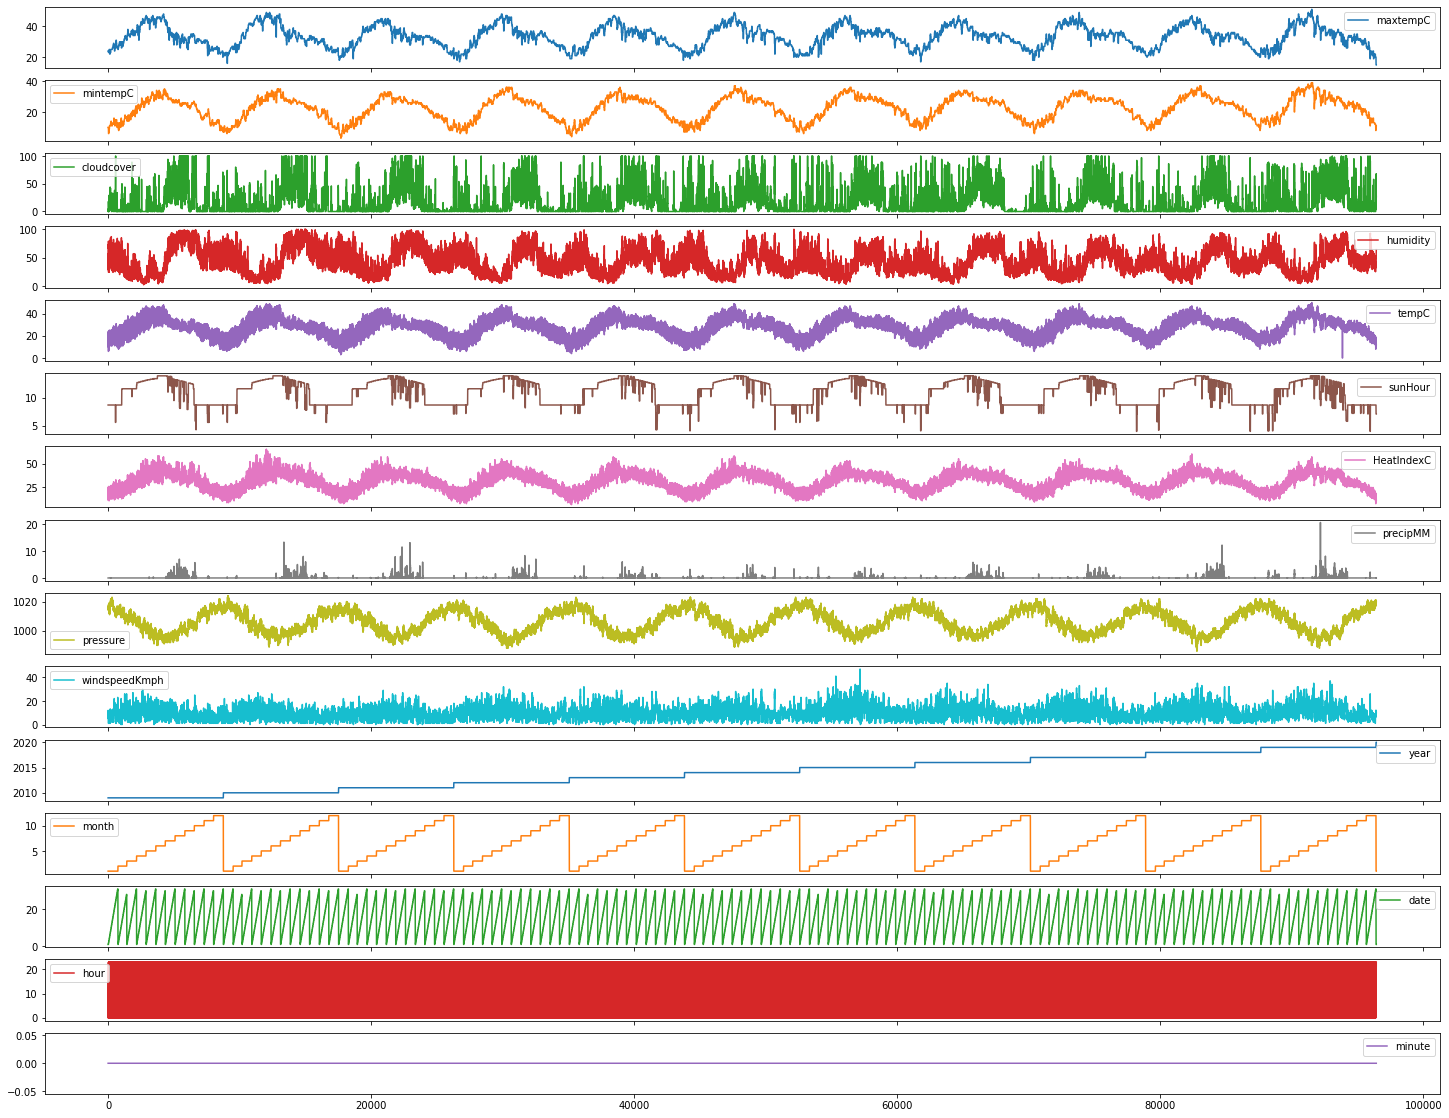

In [13]:
weather_df_num.plot(subplots=True, figsize=(25,20))

array([<AxesSubplot:>], dtype=object)

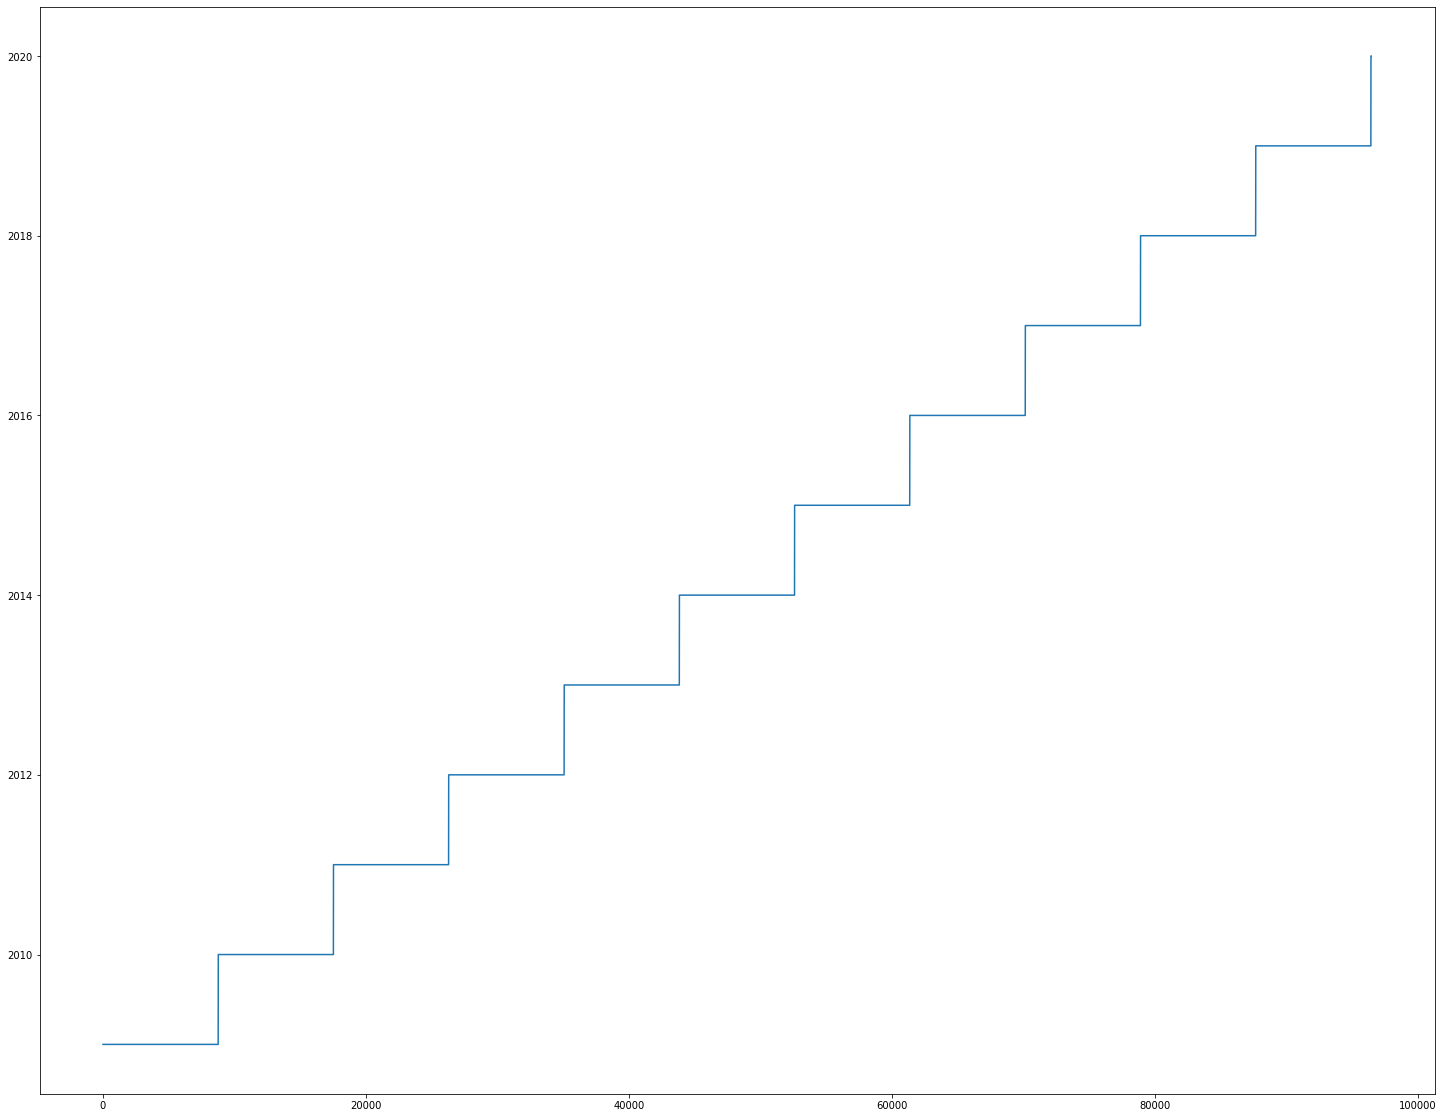

In [14]:
weather_df_num['year'].fillna(method='pad').plot(subplots=True, figsize=(25,20))

array([[<AxesSubplot:title={'center':'maxtempC'}>,
        <AxesSubplot:title={'center':'mintempC'}>,
        <AxesSubplot:title={'center':'cloudcover'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'tempC'}>,
        <AxesSubplot:title={'center':'sunHour'}>,
        <AxesSubplot:title={'center':'HeatIndexC'}>,
        <AxesSubplot:title={'center':'precipMM'}>],
       [<AxesSubplot:title={'center':'pressure'}>,
        <AxesSubplot:title={'center':'windspeedKmph'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'minute'}>, <AxesSubplot:>]],
      dtype=object)

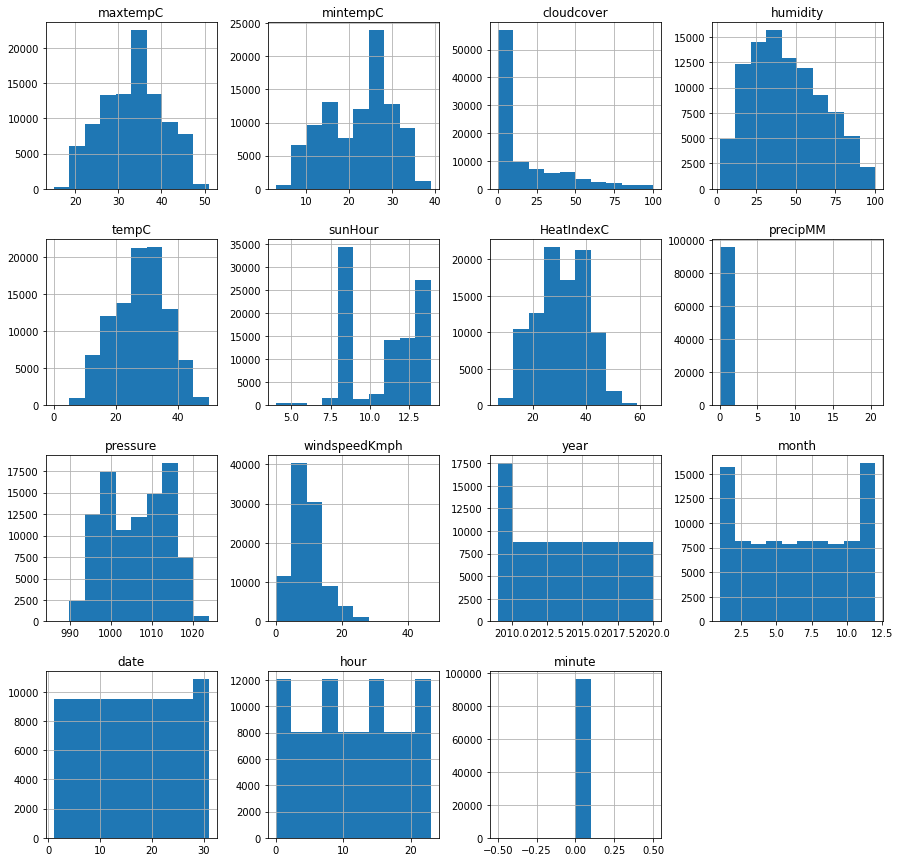

In [15]:
weather_df_num.hist(bins=10,figsize=(15,15))

In [16]:
weth=weather_df_num['year']
weth.reindex
weth.head()

0    2009
1    2009
2    2009
3    2009
4    2009
Name: year, dtype: int64

In [17]:
weather_y=weather_df_num.pop("tempC")
weather_x=weather_df_num

In [18]:
weather_y

0        11
1        11
2        11
3        10
4        11
         ..
96427    13
96428    13
96429    13
96430    13
96431    12
Name: tempC, Length: 96432, dtype: int64

In [19]:
weather_x

,maxtempC,mintempC,cloudcover,humidity,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph,year,month,date,hour,minute
0,24,10,17,50,8.7,12,0.0,1015,10,2009,1,1,0,0
1,24,10,11,52,8.7,13,0.0,1015,11,2009,1,1,1,0
2,24,10,6,55,8.7,13,0.0,1015,11,2009,1,1,2,0
3,24,10,0,57,8.7,13,0.0,1015,12,2009,1,1,3,0
4,24,10,0,54,8.7,14,0.0,1016,11,2009,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96427,15,11,53,61,7.1,13,0.0,1019,11,2020,1,1,19,0
96428,15,11,39,61,7.1,13,0.0,1020,11,2020,1,1,20,0
96429,15,11,25,62,7.1,13,0.0,1020,11,2020,1,1,21,0
96430,15,11,26,63,7.1,13,0.0,1020,11,2020,1,1,22,0


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)

In [22]:
train_X.shape

(77145, 14)

In [23]:
train_y.shape

(77145,)

In [24]:
train_y.head()

28015    22
7413     21
76942    30
91451    47
89189    18
Name: tempC, dtype: int64

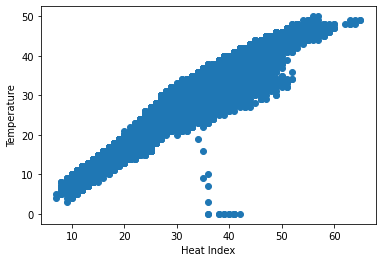

In [25]:
plt.scatter(weather_df.HeatIndexC, weather_df.tempC)
plt.xlabel("Heat Index")
plt.ylabel("Temperature")
plt.show()

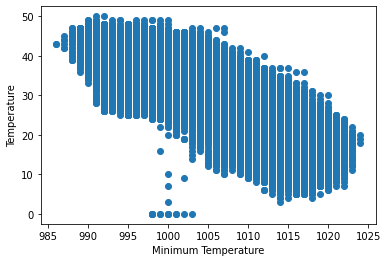

In [26]:
plt.scatter(weather_df.pressure, weather_df.tempC)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

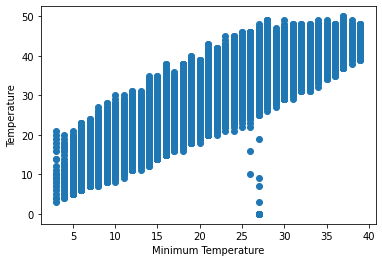

In [27]:
plt.scatter(weather_df.mintempC, weather_df.tempC)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [30]:
prediction = model.predict(test_X)

In [31]:
prediction

array([34.70609165, 24.80051034, 34.91342417, ...,  7.93110997,
       36.01307294, 25.66419612])

In [32]:
pred = model.predict(np.array([[24,10,11,52,8.7,13,0,1015,11,2009,1,1,1,0]]))

In [33]:
pred

array([12.48709232])

# save and used for web joblib 

In [34]:
import joblib

In [35]:
joblib.dump(model,"tempreture_prediction.pkl")

['tempreture_prediction.pkl']

In [36]:
model = joblib.load("tempreture_prediction.pkl")

In [42]:
p=model.predict([[24,10,11,52,8.7,13,0,1015,11,2009,1,1,1,0]])

In [43]:
p[0]

12.48709231677536

In [38]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

,Actual,Prediction,diff
39632,34,34.71,-0.71
59972,25,24.80,0.20
58905,34,34.91,-0.91
71243,28,25.20,2.80
31129,28,27.62,0.38
...,...,...,...
89769,37,33.77,3.23
60156,32,30.09,1.91
96389,8,7.93,0.07
92777,35,36.01,-1.01


In [39]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [40]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

Mean absolute error: 1.16
Residual sum of squares (MSE): 2.35
R2-score: 0.97


In [41]:
weather_df.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph,year,month,date,hour,minute
0,24,10,17,50,11,8.7,12,0.0,1015,10,2009,1,1,0,0
1,24,10,11,52,11,8.7,13,0.0,1015,11,2009,1,1,1,0
2,24,10,6,55,11,8.7,13,0.0,1015,11,2009,1,1,2,0
3,24,10,0,57,10,8.7,13,0.0,1015,12,2009,1,1,3,0
4,24,10,0,54,11,8.7,14,0.0,1016,11,2009,1,1,4,0
